In [2]:
import numpy as np
import json

In [3]:
import rasterio
from rasterio.plot import show
fp = 'Fuel_Vegetation_Cover_CONUS.tif'
img = rasterio.open(fp)
# show(img)

In [9]:
# import rasterio
# from rasterio.transform import from_origin
# from rasterio.plot import show
# with rasterio.open(
#         'Fuel_vegetation_cover_CONUS.tif', 'r', driver='GTiff', dtype='uint16',
#         width=720, height=360, count=8, crs='EPSG:4326',
#         transform=from_origin(-180.0, 90.0, 0.5, 0.5),
#         nodata=0, tiled=True, compress='lzw') as dataset:
#     print(dataset)

<open DatasetWriter name='Fuel_vegetation_cover_CONUS.tif' mode='w'>


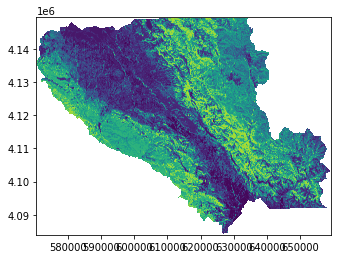

<AxesSubplot:>

In [4]:
import rasterio
from rasterio.plot import show
fp = 'Santa-Clara/SantaClaraCounty-Vegetation-SurfaceFuels-2020-Summer-00010m.tif'
img = rasterio.open(fp)
show(img)

In [5]:
imarray = img.read(1)

In [6]:
imarray.size

58049928

In [7]:
np.max(imarray)

202

In [8]:
print(img.crs)

EPSG:32610


In [9]:
affine = img.transform
affine

Affine(10.0, 0.0, 570610.0,
       0.0, -10.0, 4149430.0)

In [10]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:32610", "epsg:5070")#Change to 32610 which is the salo epsg
# transformer.transform(affine[2], affine[5])

In [11]:
len(imarray), len(imarray[0])

(6546, 8868)

In [12]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((570610.0, 4149430.0), (659290.0, 4083970.0))

In [13]:
img.bounds

BoundingBox(left=570610.0, bottom=4083970.0, right=659290.0, top=4149430.0)

In [14]:
ori_lat_long_coords = transformer.transform(origin[0], origin[1])
end_lat_long_coords = transformer.transform(end[0], end[1])
ori_lat_long_coords, end_lat_long_coords

((-2265846.2014394025, 1919911.179234505),
 (-2200042.216985933, 1831798.4959051241))

In [ ]:
transformer.transform()

In [ ]:
#((37.48908544352257, -122.20127766290896),
# (36.888272429602885, -121.21243727715039))

In [14]:
d = {}
i = 0
while i < int(len(imarray) / 2):
    j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
#     latitude = topmost - i * 2 * delta_lat - 0.5 * delta_lat
    row1 = imarray[2 * i]
    row2 = imarray[2 * i + 1]
    
    while j < int(len(imarray[0]) / 2):
        epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
        lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
        latitude = lat_long_coords[0]
        longitude = lat_long_coords[1]
#         longitude = leftmost + j * 2 * delta_long + 0.5 * delta_long
        d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
        j += 1
    if j < len(imarray[0]) / 2:
        epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
        lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
        latitude = lat_long_coords[0]
        longitude = lat_long_coords[1]
        d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2
    i += 1
    if i % (len(imarray) // 100) == 0:
        print(str(int(i / len(imarray) * 200)) + "%")
if i < len(imarray) / 2:
    j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
    while j < int(len(imarray[0]) / 2):
        epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
        lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
        latitude = lat_long_coords[0]
        longitude = lat_long_coords[1]
        d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
        j += 1
    if j < len(imarray[0]) / 2:
        epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
        lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
        latitude = lat_long_coords[0]
        longitude = lat_long_coords[1]
        d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2

<ipython-input-14-18f61f62bfd9>:17: RuntimeWarning: overflow encountered in short_scalars
  d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4


KeyboardInterrupt: 

In [ ]:
len(d.keys())

In [ ]:
d_key_list = list(d.keys())

In [ ]:
d_key_list[8600000]

In [ ]:
rightmost = -130
leftmost = -110
topmost = 30
bottommost = 50

In [ ]:
for coord in d_key_list:
    lat = float(coord.split(", ")[0])
    long = float(coord.split(", ")[1])
    if long < leftmost:
        leftmost = long
    if long > rightmost:
        rightmost = long
    if lat > topmost:
        topmost = lat
    if lat < bottommost:
        bottommost = lat

In [ ]:
rightmost, leftmost, topmost, bottommost

In [ ]:
d[d_key_list[8600000]]

In [ ]:
import pickle
pickle_out = open("SantaClaraFuelLongLat.pickle", "wb")
pickle.dump(d, pickle_out)
pickle_out.close()

In [ ]:
d_key_list[0]

In [ ]:
d[d_key_list[0]]